### Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Installing keras tuner

In [ ]:
! pip install keras-tuner

### Importing libraries

In [ ]:
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
X=pickle.load(open('/content/drive/MyDrive/Fresh and rotten fruit classifiication/DataSet/train/Images.pkl', 'rb'))
Y=pickle.load(open('/content/drive/MyDrive/Fresh and rotten fruit classifiication/DataSet/train/Labels.pkl', 'rb'))

In [ ]:
X.shape

(9497, 100, 100, 3)

In [ ]:
Y.shape

(9497,)

### Scaling Data

In [ ]:
X = X/255.0

### Creatiing model

In [ ]:
def create_model(hp):
  model=Sequential([
                    keras.layers.Conv2D(
                        filters = hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
                        kernel_size=hp.Choice('conv_1_kernal', values=[3,5]),
                        activation = 'relu',
                        input_shape = (100,100,3)
                    ),
                    keras.layers.Conv2D(
                        filters = hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
                        kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
                        activation='relu'
                    ),
                    keras.layers.Conv2D(
                        filters = hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
                        kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
                        activation='relu'
                    ),
                    keras.layers.Flatten(),
                    keras.layers.Dense(
                        units=hp.Int('dense_1_unit', min_value=32, max_value=128, step=16),
                        activation='relu'
                    ),
                    keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                loss='binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search = RandomSearch(create_model, objective='val_accuracy', max_trials=5, directory = 'Output', project_name = 'Fresh & Rotten Classification7')

In [ ]:
tuner_search.search(X,Y, epochs=5, validation_split=0.1)

Trial 5 Complete [00h 01m 52s]
val_accuracy: 0.945263147354126

Best val_accuracy So Far: 0.9768421053886414
Total elapsed time: 00h 09m 59s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 80)        2240      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 96)        69216     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 96)        83040     
_________________________________________________________________
flatten (Flatten)            (None, 848256)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                27144224  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 27,298,753
Trainable params: 27,298,753
Non-trainable params: 0
____________________________________________

In [ ]:
model.fit(X,Y, epochs=13, validation_split=0.1, initial_epoch=1)

Epoch 2/13
268/268 [==============================] - 28s 103ms/step - loss: 1.7744e-04 - accuracy: 1.0000 - val_loss: 0.0415 - val_accuracy: 0.9832
Epoch 3/13
268/268 [==============================] - 28s 104ms/step - loss: 1.0147e-04 - accuracy: 1.0000 - val_loss: 0.0415 - val_accuracy: 0.9832
Epoch 4/13
268/268 [==============================] - 27s 101ms/step - loss: 7.6385e-05 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 0.9832
Epoch 5/13
268/268 [==============================] - 28s 103ms/step - loss: 5.9282e-05 - accuracy: 1.0000 - val_loss: 0.0451 - val_accuracy: 0.9821
Epoch 6/13
268/268 [==============================] - 28s 104ms/step - loss: 4.7302e-05 - accuracy: 1.0000 - val_loss: 0.0465 - val_accuracy: 0.9842
Epoch 7/13
268/268 [==============================] - 28s 103ms/step - loss: 3.9092e-05 - accuracy: 1.0000 - val_loss: 0.0490 - val_accuracy: 0.9832
Epoch 8/13
268/268 [==============================] - 28s 103ms/step - loss: 3.2128e-05 - accuracy: 1.0000

In [ ]:
df_eval=pd.DataFrame(model.history.history)

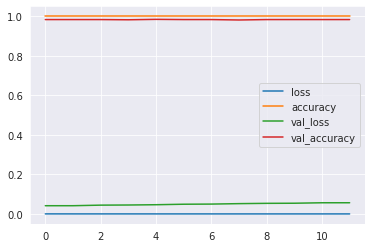

In [ ]:
df_eval.plot()

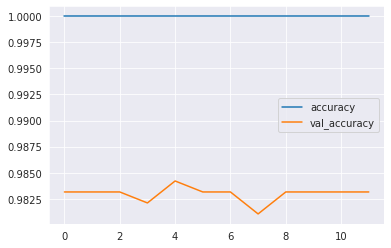

In [ ]:
df_eval[['accuracy', 'val_accuracy']].plot()

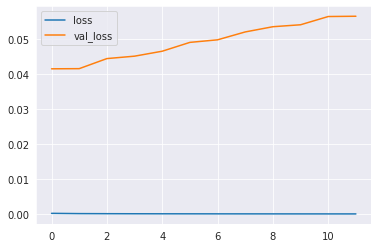

In [ ]:
df_eval[['loss', 'val_loss']].plot()

In [ ]:
model.save('FruitClassifier.h5')

In [ ]:
from keras.models import load_model

In [ ]:
loaded_model = load_model('FruitClassifier.h5')

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 80)        2240      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 96)        192096    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 96)        230496    
_________________________________________________________________
flatten (Flatten)            (None, 777600)            0         
_________________________________________________________________
dense (Dense)                (None, 112)               87091312  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 113       
Total params: 87,516,257
Trainable params: 87,516,257
Non-trainable params: 0
____________________________________________

In [ ]:
loaded_model

In [ ]:
loaded_model.evaluate(X,Y, batch_size=10)

950/950 [==============================] - 13s 14ms/step - loss: 0.0057 - accuracy: 0.9983


[0.005662905052304268, 0.9983152747154236]